In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [4]:
model = load_model('02_worthyResults/run_34/step_0003/14_64_32_8_1/14_64_32_8_1_000.keras')

In [5]:
def plot_regression_line(model, x, y):
    plt.scatter(y, model.predict(x), color = "m", marker = "o", s = 30)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [6]:
def load_and_scale_data(dataDir, dataNm, nPars, nObjs):
    """ function to load samples and scale them to be in <0,1> """

    # load samples
    with open(dataDir + dataNm, 'r') as file:
        data = file.readlines()

    # remove annotation row
    data = data[1::]

    # convert the data to numpy array
    dataNum = []
    for line in data:
        lineSpl = line.split(',')
        row = []
        for value in lineSpl:
            row.append(float(value))
        dataNum.append(row)

    dataNum = np.array(dataNum)

    # scale the data
    colMins = np.min(dataNum, axis=0)
    colMaxs = np.max(dataNum, axis=0)
    for rowInd in range(dataNum.shape[0]):
        for colInd in range(dataNum.shape[1]):
            dataNum[rowInd, colInd] = (dataNum[rowInd, colInd] - colMins[colInd]) / (
                    colMaxs[colInd] - colMins[colInd])

    # split and transpose
    source = dataNum[:, :nPars].T
    target = dataNum[:, nPars:nPars + nObjs].T

    return source, target

242/242 [==============================] - 0s 363us/step


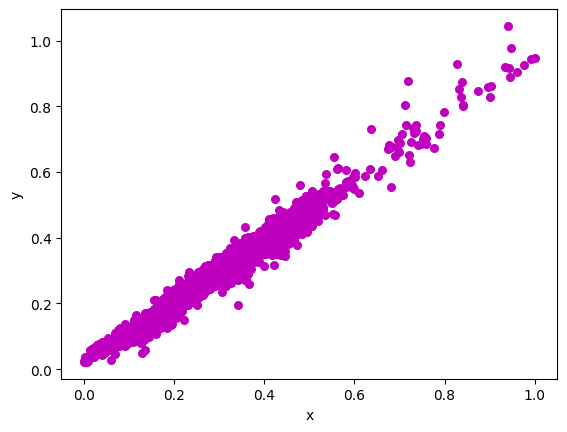

In [14]:
X, y = load_and_scale_data('../00_prepCFDData/14_LConv2CPLDiff4CP/', '10_platypusCFDAllSolutions.dat', 14, 1)

plot_regression_line(model, X.T, y)